In [1]:
import matplotlib.pyplot as plt

import requests
import os
from pathlib import Path
import rasterio as rio
from rasterio.plot import show
# from rasterio.merge import merge

import rioxarray as rxr
from rioxarray.merge import merge_arrays

import geopandas as gpd

import subprocess

In [3]:
url = 'https://tnmaccess.nationalmap.gov/api/v1/products?bbox=-118.944703049253,33.7046743723892,-117.646385981235,34.823304156602&datasets=National%20Elevation%20Dataset%20%28NED%29%201%20arc-second&outputFormat=JSON'

In [4]:
response = requests.get(url)
response.status_code

200

In [5]:
data = response.json()
data.keys()

dict_keys(['total', 'items', 'errors', 'messages', 'sciencebaseQuery', 'filteredOut'])

In [6]:
DEM_downloadURL_list = [list(data.items())[1][1][item]['downloadURL'] for item in range(len(data.items()))]
DEM_downloadURL_list

['https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w118/USGS_1_n35w118_20221019.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w118/USGS_1_n35w118_20250508.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w119/USGS_1_n35w119_20240207.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w119/USGS_1_n35w119_20250515.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n34w118/USGS_1_n34w118_20190917.tif',
 'https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n34w119/USGS_1_n34w119_20190917.tif']

In [7]:
input_dems = Path('../Data/Inputs/DEMs/Inputs')

In [8]:
def download_file(url, save_path):
    response = requests.get(url, stream=True)
    
    if response.status_code == 200:
        with open(save_path, 'wb') as file:
            file.write(response.content)
        print(f'{url} downloaded')
    else:
        print(f'{url} failed')

In [9]:
for url in DEM_downloadURL_list:
    file_name = url.split('/')[-1]
    save_path = os.path.join(input_dems, file_name)
    download_file(url, save_path)

https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w118/USGS_1_n35w118_20221019.tif downloaded
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w118/USGS_1_n35w118_20250508.tif downloaded
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w119/USGS_1_n35w119_20240207.tif downloaded
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n35w119/USGS_1_n35w119_20250515.tif downloaded
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n34w118/USGS_1_n34w118_20190917.tif downloaded
https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/1/TIFF/historical/n34w119/USGS_1_n34w119_20190917.tif downloaded


In [10]:
test_dataset = rxr.open_rasterio(r'../Data/Inputs/DEMs/Inputs/USGS_1_n34w119_20190917.tif', masked=True).squeeze()

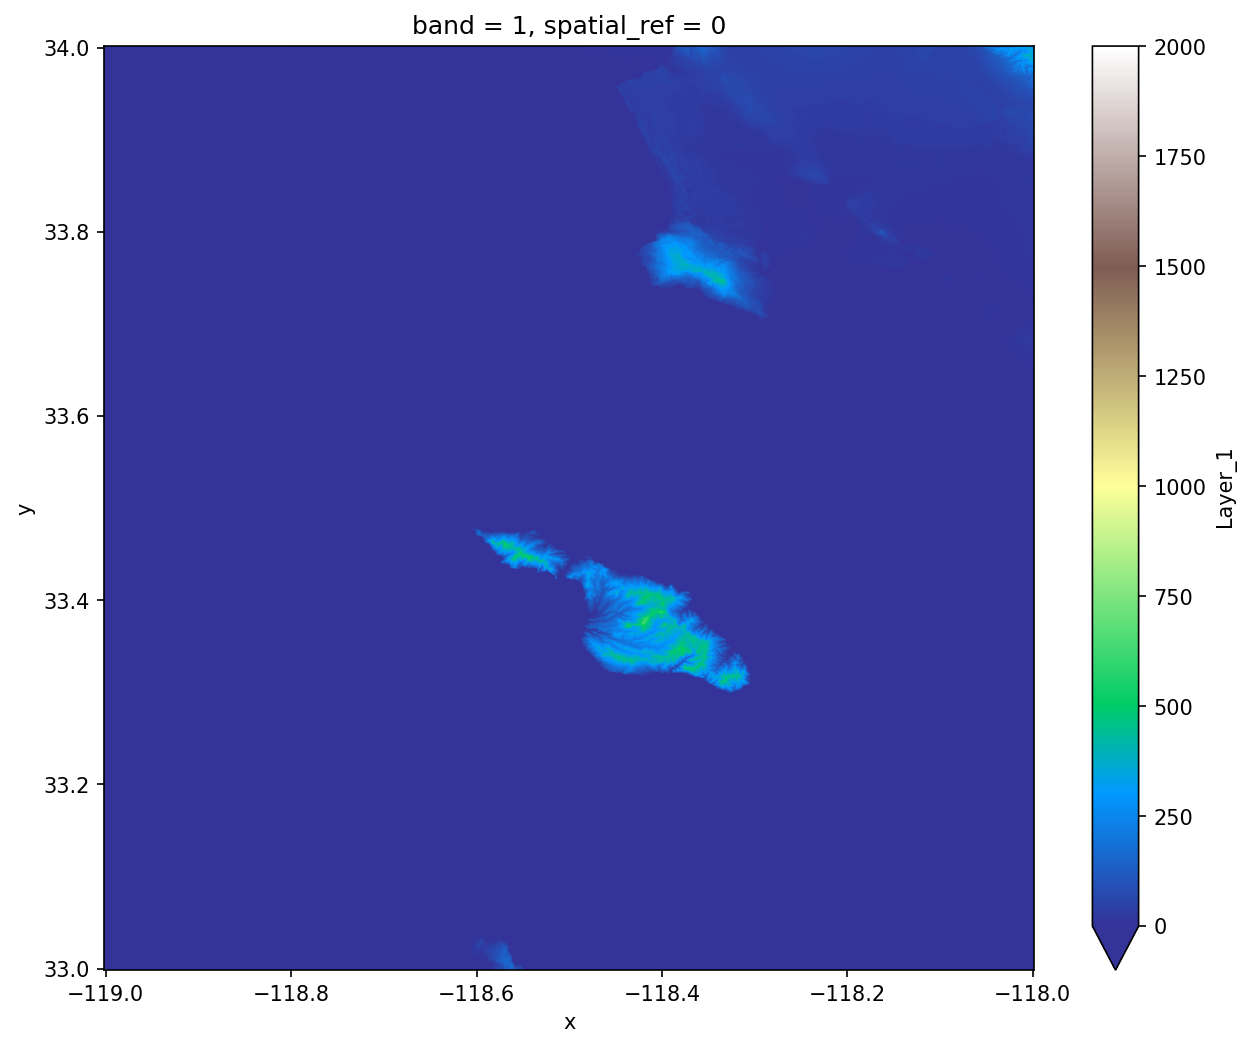

In [11]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
test_dataset.plot(ax=ax, cmap='terrain', vmin=0, vmax=2000)
plt.show();

This is a good sign so far. We have a nice little visualization of Catalina Island

In [12]:
test_dataset.rio.crs

CRS.from_wkt('GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4269"]]')

The CRS is not in WGS84 like the rest of my project.

In [13]:
raster_files = list(input_dems.iterdir())

In [14]:
for i, f in enumerate(raster_files):
    da = rxr.open_rasterio(f, masked=True)
    print(f"\n=== File {i+1}: {f.name} ===")
    print(f"Shape: {da.shape}")
    print(f"Bands: {da.rio.count}")
    print(f"CRS: {da.rio.crs}")
    print(f"Resolution: {da.rio.resolution()}")
    print(f"Dtype: {da.dtype}")
    print(f"NoData value: {da.rio.nodata}")


=== File 1: USGS_1_n34w118_20190917.tif ===
Shape: (1, 3612, 3612)
Bands: 1
CRS: EPSG:4269
Resolution: (0.00027777777778704527, -0.00027777777778704527)
Dtype: float32
NoData value: nan

=== File 2: USGS_1_n34w119_20190917.tif ===
Shape: (1, 3612, 3612)
Bands: 1
CRS: EPSG:4269
Resolution: (0.0002777777779114886, -0.0002777777779114886)
Dtype: float32
NoData value: nan

=== File 3: USGS_1_n35w118_20221019.tif ===
Shape: (1, 3612, 3612)
Bands: 1
CRS: EPSG:4269
Resolution: (0.000277777777786999, -0.00027777777803598015)
Dtype: float32
NoData value: nan

=== File 4: USGS_1_n35w118_20250508.tif ===
Shape: (1, 3612, 3612)
Bands: 1
CRS: EPSG:4269
Resolution: (0.000277777777786999, -0.00027777777803598015)
Dtype: float32
NoData value: nan

=== File 5: USGS_1_n35w119_20240207.tif ===
Shape: (1, 3612, 3612)
Bands: 1
CRS: EPSG:4269
Resolution: (0.00027777777803598015, -0.00027777777803598015)
Dtype: float32
NoData value: nan

=== File 6: USGS_1_n35w119_20250515.tif ===
Shape: (1, 3612, 3612)
Ban

In [16]:
data_arrays = [rxr.open_rasterio(fp, masked=True) for fp in raster_files]
la_dem = merge_arrays(data_arrays)

In [28]:
la_dem.rio.crs

CRS.from_wkt('GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4269"]]')

In [29]:
la_dem = la_dem.rio.reproject("EPSG:4326")

In [30]:
la_dem.rio.to_raster('../Data/Inputs/DEMs/Outputs/la_dem.tif')

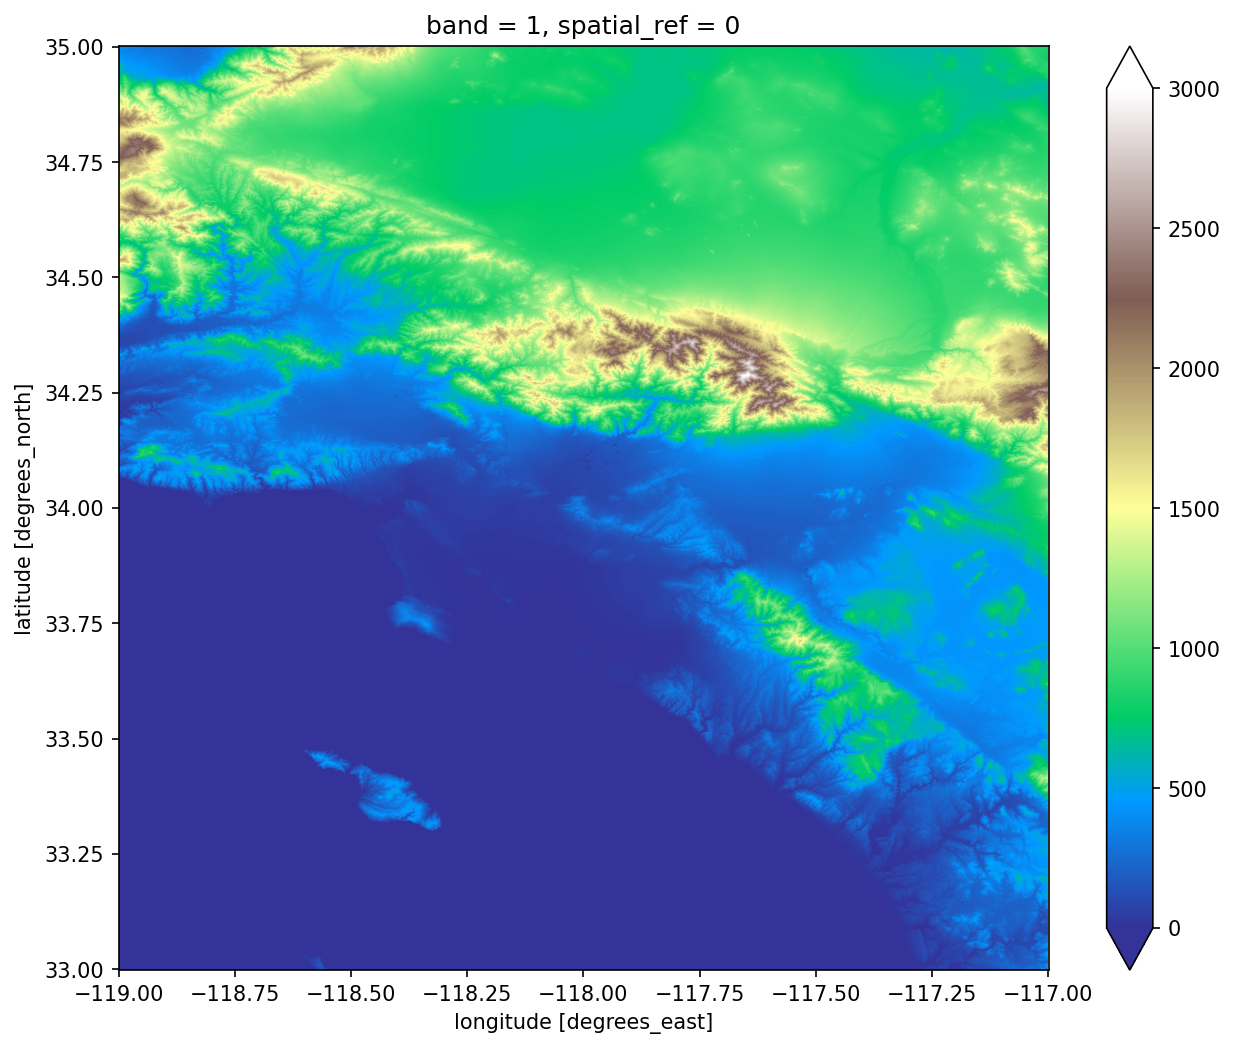

In [31]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
la_dem.plot(ax=ax, cmap='terrain', vmin=0, vmax=3000)
plt.show()

In [25]:
la_dem

<xarray.DataArray (band: 1, y: 7213, x: 7213)> Size: 208MB
array([[[493.89987, 493.52313, 499.21524, ..., 844.0112 , 843.58057,
               nan],
        [491.15067, 482.97208, 490.816  , ..., 843.117  , 842.75024,
               nan],
        [490.78128, 477.16144, 476.94586, ..., 842.28516, 841.8669 ,
               nan],
        ...,
        [      nan,       nan,       nan, ..., 345.72107, 346.10864,
               nan],
        [      nan,       nan,       nan, ..., 348.91913, 347.56247,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 58kB -119.0 -119.0 -119.0 ... -117.0 -117.0 -117.0
  * y            (y) float64 58kB 35.0 35.0 35.0 35.0 ... 33.0 33.0 33.0 33.0
    spatial_ref  int64 8B 0
  * band         (band) int64 8B 1
Attributes:
    AREA_OR_POINT:  Area

In [7]:
la_basemap = gpd.read_file("../Data/Inputs/Boundary_Shapefile/City_Boundaries.geojson")

In [5]:
la_dem = rxr.open_rasterio(r'../Data/Inputs/DEMs/Outputs/la_dem.tif', masked=True)

In [9]:
clip = la_dem.rio.clip(la_basemap.geometry, la_basemap.crs, drop=True, invert=False)

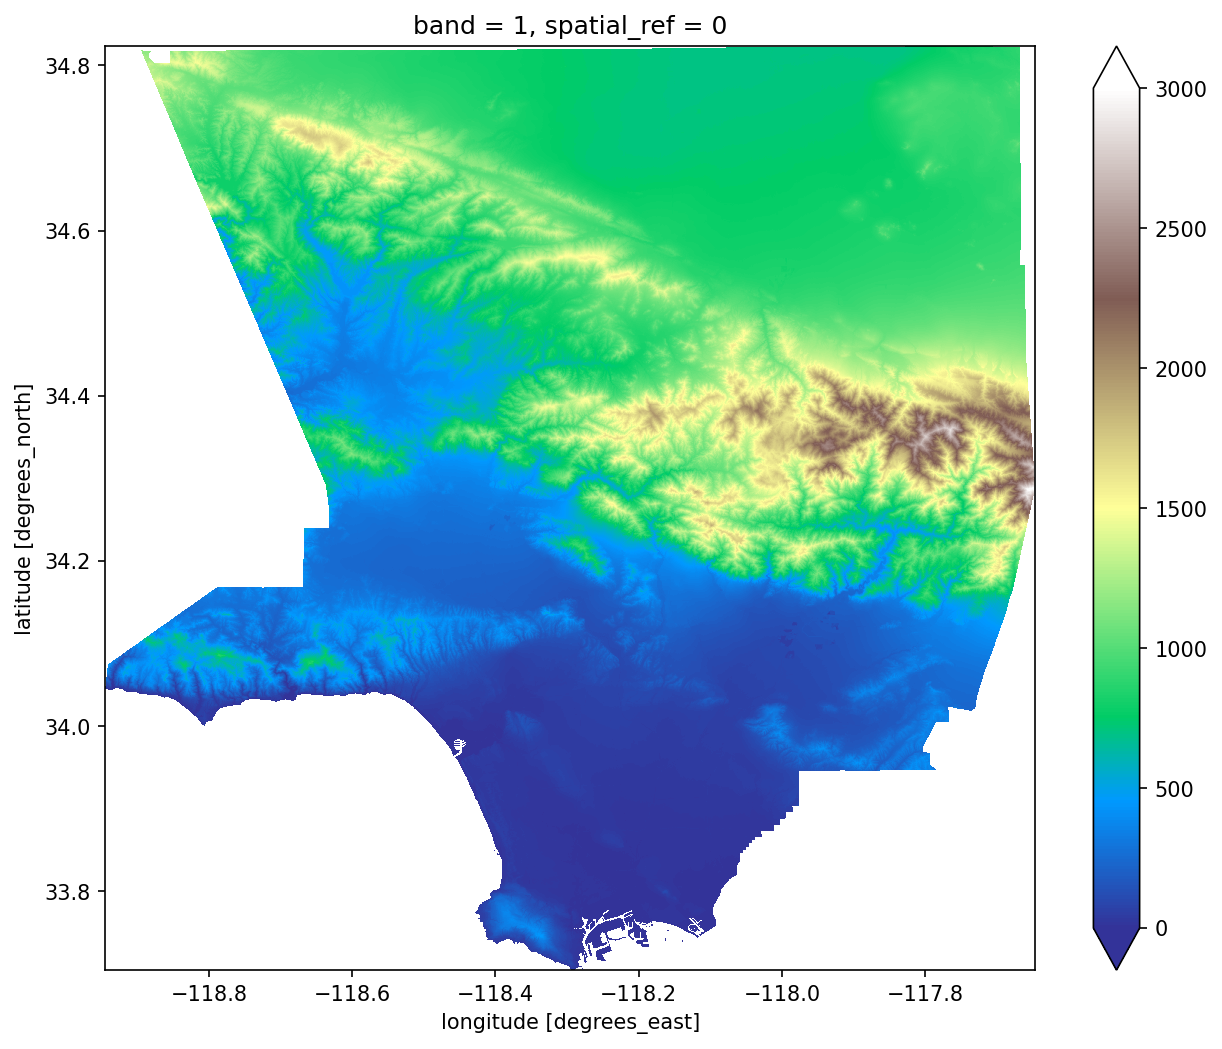

In [11]:
fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
clip.plot(ax=ax, cmap='terrain', vmin=0, vmax=3000)
plt.show()

In [12]:
clip.rio.to_raster('../Data/Inputs/DEMs/Outputs/clipped_dem.tif')